# Final Project: 

### Problem Statement

At some point or the other almost each one of us has used an Ola or Uber for taking a ride. 

Ride hailing services are services that use online-enabled platforms to connect between passengers and local drivers using their personal vehicles. In most cases they are a comfortable method for door-to-door transport. Usually they are cheaper than using licensed taxicabs. Examples of ride hailing services include Uber and Lyft.

<img src="2560px-Ride_hailing_services_Wikivoyage_banner.jpg">

To improve the efficiency of taxi dispatching systems for such services, it is important to be able to predict how long a driver will have his taxi occupied. If a dispatcher knew approximately when a taxi driver would be ending their current ride, they would be better able to identify which driver to assign to each pickup request.

In this competition, we are challenged to build a model that predicts the total ride duration of taxi trips in New York City.

# 1. Exploratory Data Analysis
Let's check the data files! According to the data description we should find the following columns:

 - **id** - a unique identifier for each trip
 - **vendor_id** - a code indicating the provider associated with the trip record
 - **pickup_datetime** - date and time when the meter was engaged
 - **dropoff_datetime** - date and time when the meter was disengaged
 - **passenger_count** - the number of passengers in the vehicle (driver entered value)
 - **pickup_longitude** - the longitude where the meter was engaged
 - **pickup_latitude** - the latitude where the meter was engaged
 - **dropoff_longitude** - the longitude where the meter was disengaged
 - **dropoff_latitude** - the latitude where the meter was disengaged
 - **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor      because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
 - **trip_duration** - (target) duration of the trip in seconds

Here, we have 2 variables dropoff_datetime and store_and_fwd_flag which are not available before the trip starts and hence will not be used as features to the model.

### 1.1 Load Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
df = pd.read_csv(r"nyc_taxi_trip_duration.csv")

### Print first five rows

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


### Print last five rows

In [4]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


### Type of Dataset

In [6]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

### File structure and content

In [7]:
print('We have total rows: {}'.format(df.shape[0]))
print('We have total columns: {}'.format(df.shape[1]))

We have total rows: 729322
We have total columns: 11


### First row elements

In [8]:
df.iloc[0,:]

id                              id1080784
vendor_id                               2
pickup_datetime       2016-02-29 16:40:21
dropoff_datetime      2016-02-29 16:47:01
passenger_count                         1
pickup_longitude               -73.953918
pickup_latitude                 40.778873
dropoff_longitude              -73.963875
dropoff_latitude                40.771164
store_and_fwd_flag                      N
trip_duration                         400
Name: 0, dtype: object

At first glance, we can see the types of each variable and what they look like. 

### Missing Values
Knowing about missing values is important because they indicate how much we don’t know about our data. Making inferences based on just a few cases is often unwise. In addition, many modelling procedures break down when missing values are involved and the corresponding rows will either have to be removed completely or the values need to be estimated somehow.

In [9]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Fortunately, in this dataset we do not have any missing values which is great.

### Reformatting features & Checking consistency
There are a variety of features within the dataset and it is important to convert them into the right format such that we can analyse them easily. This would include converting datetime features and string features. 

Also, one important thing is never to take assumptions without backing it with data. Here, as you can see the trip duration can also be calculated pick up and drop off datetime. We will check whether the given duration is consistent with the calculated trip duration 

In [10]:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [11]:
# converting strings to datetime features
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

# Converting yes/no flag to 1 and 0
df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y')

df['check_trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = df[np.abs(df['check_trip_duration'].values  - df['trip_duration'].values) > 1]
duration_difference.shape

(0, 12)

This implies that there is no inconsistency in data wrt the drop location and trip duration

### Target Exploration
In this section we will take a look at the trip duration which is the target variable. It is crucial to understand it in detail as this is what we are trying to predict accurately.

In [12]:
df['trip_duration'].describe()/360 # Trip duration in hours

count    2025.894444
mean        2.645081
std        10.735073
min         0.002778
25%         1.102778
50%         1.841667
75%         2.986111
max      5388.155556
Name: trip_duration, dtype: float64

Woah! There is a trip with duration of 979 hours. This is a huge outlier and might create problems at the prediction stage. One idea is to log transform the trip duration before prediction to visualise it better.

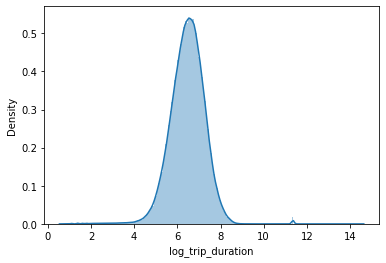

In [13]:
df['log_trip_duration'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['log_trip_duration'], kde = True, bins = 200)
plt.show()

We find:

1. The majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just around exp(6.5)  i.e. about 17 minutes.
2. There are several suspiciously short rides with less than 10 seconds duration.
3. As discussed earlier, there are a few huge outliers near 12.

### Univariate Visualization
First of all, let us look at some of the binary features. Looking at each feature might uncover some insight that might be useful at later modelling stages

Text(0, 0.5, 'Frequency')

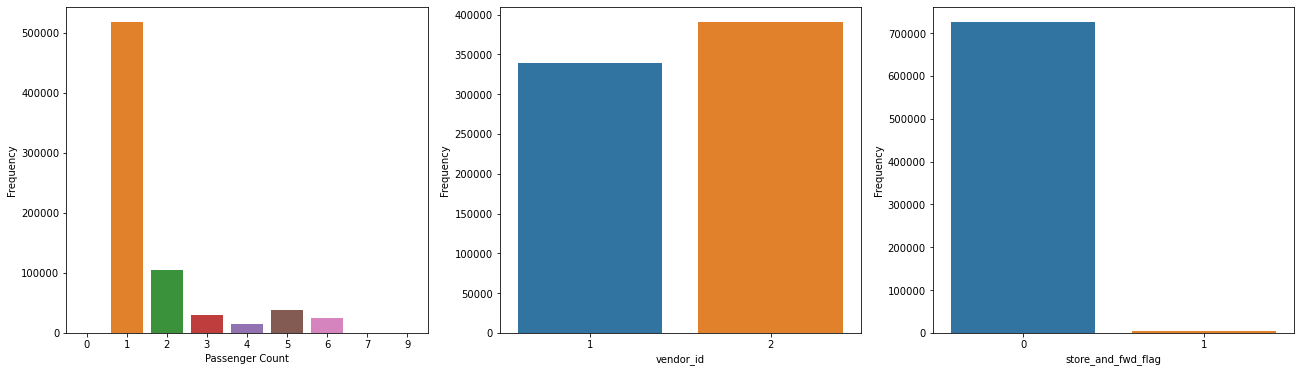

In [14]:
# Binary Features
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(131)
sns.countplot(df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')


# vendor_id
plt.subplot(132)
sns.countplot(df['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(df['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')


Observations:
1. Most of the trips involve only 1 passenger. There are trips with 7-9 passengers but they are very low in number.
2. Vendor 2 has more number of trips as compared to vendor 1
3. The store_and_fwd_flag values, indicating whether the trip data was sent immediately to the vendor (“0”) or held in the memory of the taxi because there was no connection to the server (“1”), show that there was almost no storing taking place

Now, we will delve into the datetime features to understand the trend of number of hourly/monthly/daily taxi trips 

In [15]:
df['pickup_datetime'].min(), df['pickup_datetime'].max()

(Timestamp('2016-01-01 00:01:14'), Timestamp('2016-06-30 23:59:37'))

Clearly, These trips are for first 6 months of 2016. To look at trends, we first need to extract week days and hour of day from the pickup date.

In [16]:
df['day_of_week'] = df['pickup_datetime'].dt.weekday
df['hour_of_day'] = df['pickup_datetime'].dt.hour

Text(0, 0.5, 'Total number of pickups')

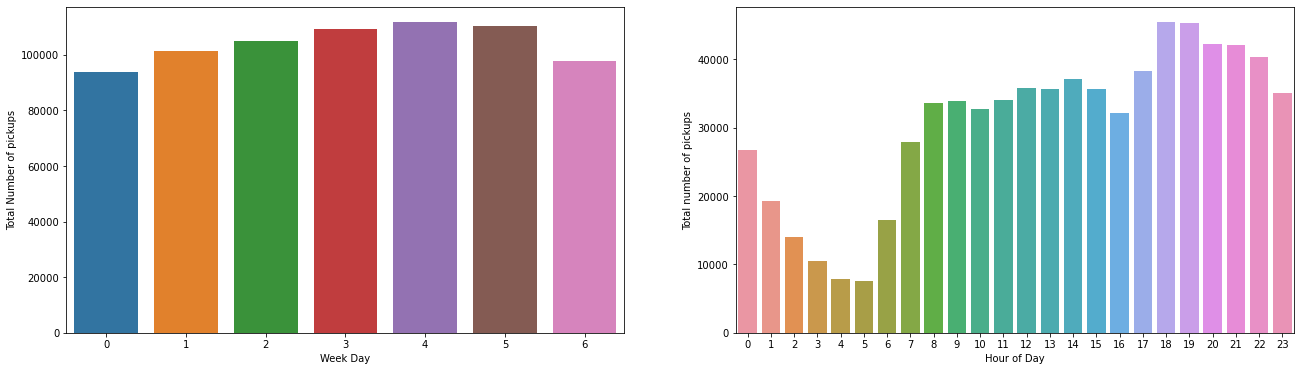

In [17]:
# Datetime features
plt.figure(figsize=(22, 6))

# Passenger Count
plt.subplot(121)
sns.countplot(df['day_of_week'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')

# vendor_id
plt.subplot(122)
sns.countplot(df['hour_of_day'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')


* Number of pickups for weekends is much lower than week days with a peak on Thursday (4). Note that here weekday is a decimal number, where 0 is Sunday and 6 is Saturday.
* Number of pickups as expected is highest in late evenings. However, it is much lower during the morning peak hours.

### Lattitude & Longitude

Lets look at the geospatial or location features to check consistency. They should not vary much as we are only considering trips within New York city.

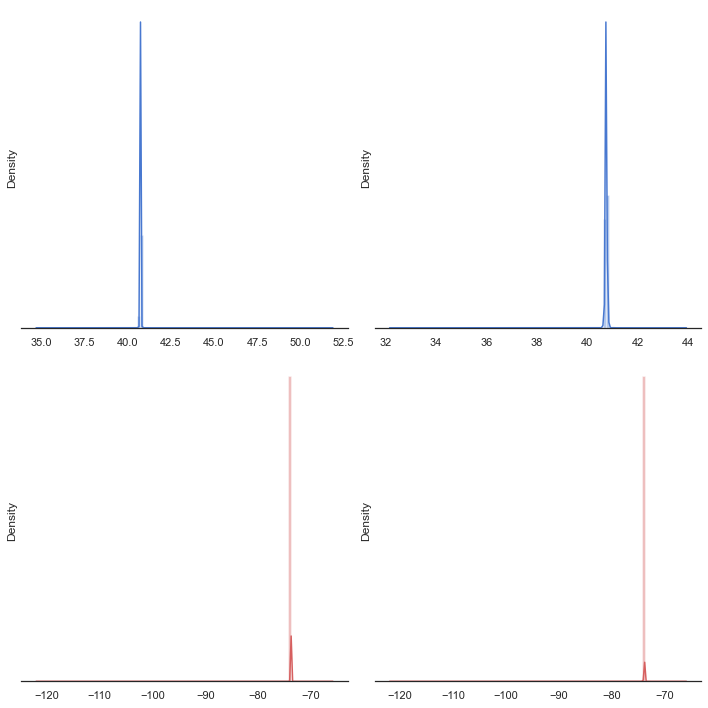

In [18]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1,0])
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0,1])
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

Findings - (Here, red represents pickup and dropoff Longitudes & blue represents pickup & dropoff lattitudes)

1. From the plot above it is clear that pick and drop latitude are centered around 40 to 41, and longitude are situated around -74 to -73. 
2. Some extreme co-ordinates has squeezed the plot such that we see a spike here
3. A good idea is to remove these outliers and look at the distribution more closely

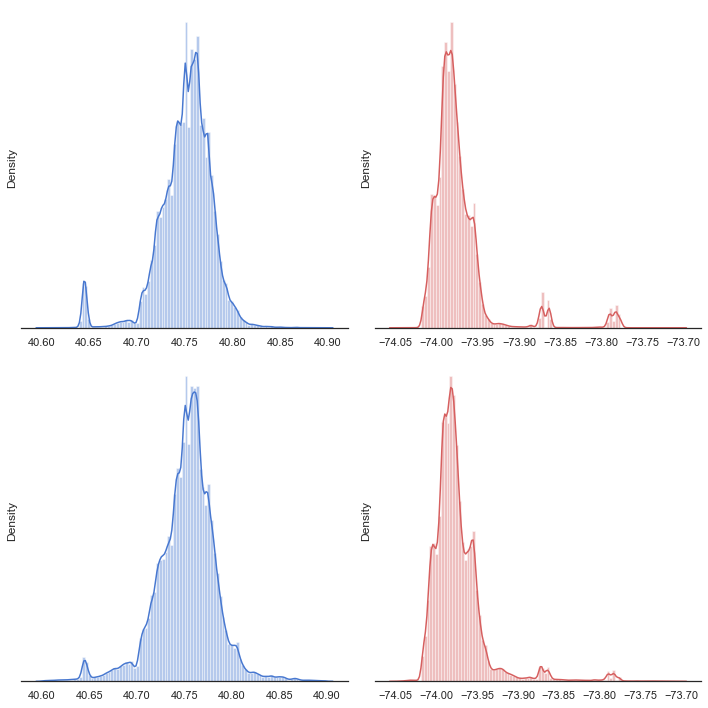

In [19]:
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df_data_new = df.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(df_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(df_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sns.distplot(df_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

* We have a much better view of the distribution of coordinates instead of spikes. And we see that most trips are concentrated between these lat long only with a few significant clusters.
* These clusters are represented by the numerous peaks in the lattitude and longitude histograms


### Bivariate Relations with Target
Now that we have gone through all the basic features one by one. Let us start looking at their relation with the target. This will help us in selecting and extracting features at the modelling stage.

In [20]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'check_trip_duration', 'log_trip_duration',
       'day_of_week', 'hour_of_day'],
      dtype='object')

### Trip Duration vs Weekday

For different week days, the trip durations can vary as different week days might have different traffic densities especially the weekends might have a much different patterns as compared to working days. Weekday is taken as a decimal number, where 0 - Sunday and 6 is Saturday.

In [21]:
summary_wdays_avg_duration = pd.DataFrame(df.groupby(['day_of_week'])['trip_duration'].median())
summary_wdays_avg_duration

,trip_duration
day_of_week,
0,629.0
1,676.0
2,695.0
3,706.0
4,688.0
5,634.0
6,599.0


In [22]:
summary_wdays_avg_duration.reset_index(inplace=True)

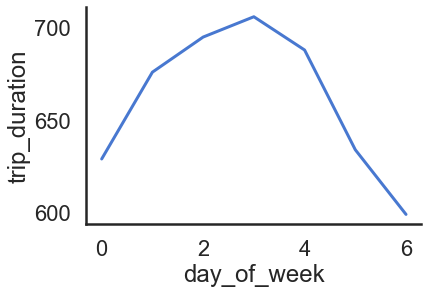

In [23]:
summary_wdays_avg_duration['unit']=1

sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
sns.lineplot(data=summary_wdays_avg_duration, x="day_of_week", y="trip_duration")
sns.despine(bottom = False)

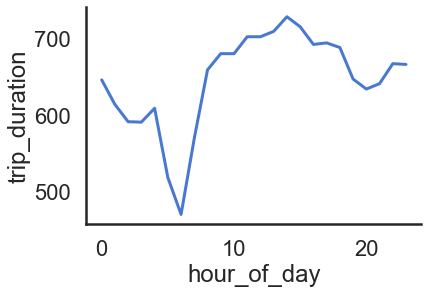

In [24]:
summary_hourly_avg_duration = pd.DataFrame(df.groupby(['hour_of_day'])['trip_duration'].median())
summary_hourly_avg_duration.reset_index(inplace = True)
summary_hourly_avg_duration['unit']=1

sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
sns.lineplot(data=summary_hourly_avg_duration, x="hour_of_day", y="trip_duration")
sns.despine(bottom = False)

* Trip durations are definitely shorter for late night and early morning hours that can be attributed to low traffic density
* It follows a similar pattern when compared to number of pickups indicating a correlation between number of pickups and trip duration

### vendor_id vs Trip Duration

Let's check how the trip duration varies for different vendors.

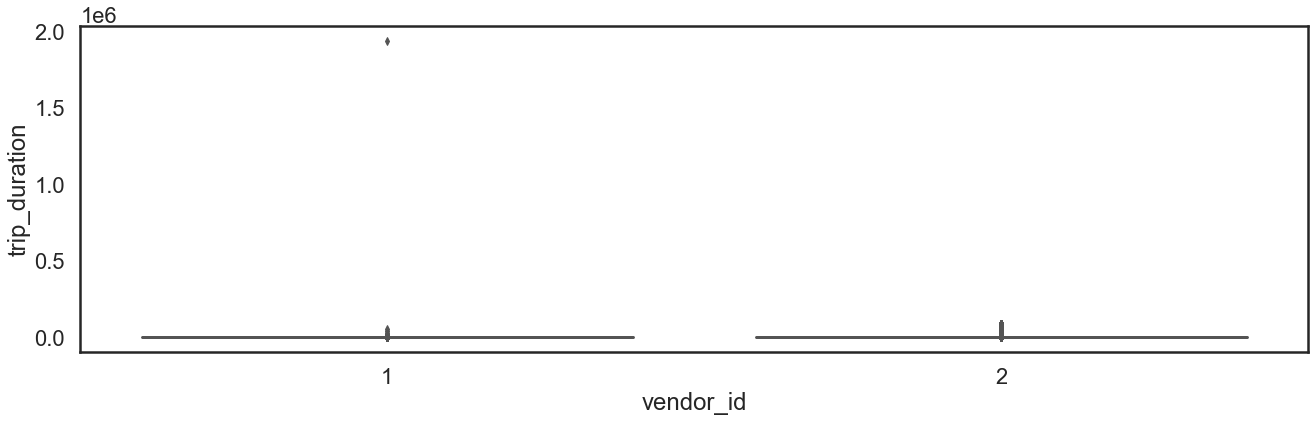

In [25]:
plt.figure(figsize=(22, 6))
sns.boxplot(x="vendor_id", y="trip_duration", data=df)
plt.show()

Woah! This did not came out as expected. The only thing I can see from this boxplot is that for vendor 2, there are a number of outliers exceeding 24 hours while vendor 1 does not have such long trips.

There could be 2 solutions to this:
1. Remove the huge outliers and plot again 
2. Look at median trip duration for both vendors on hourly basis

Let's try the first technique now and check trips below 50000 seconds only

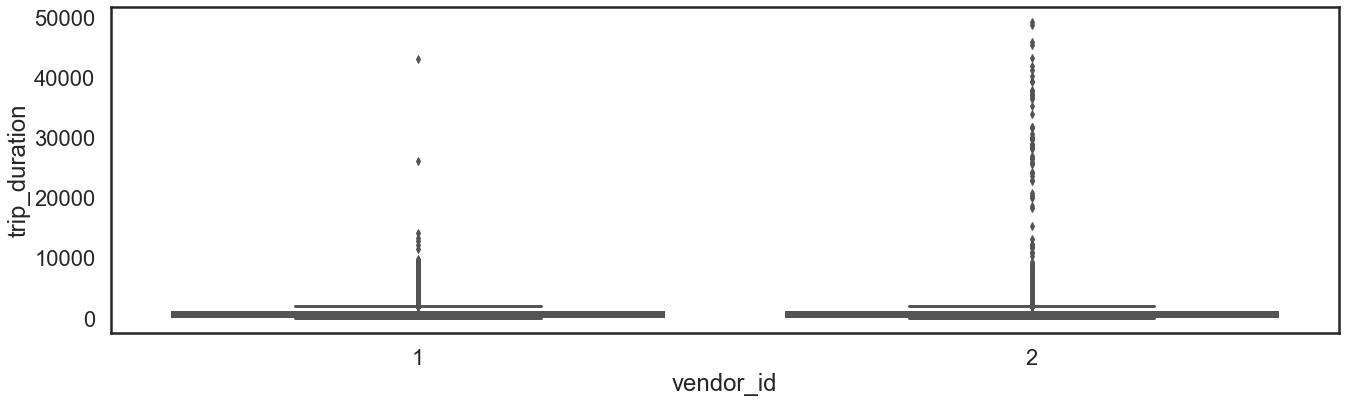

In [26]:
plt.figure(figsize=(22, 6))
df_sub = df[df['trip_duration'] < 50000]
sns.boxplot(x="vendor_id", y="trip_duration", data=df_sub)
plt.show()

As you can see, we were in a false perception earlier that vendor 1 had more outliers. Since the median is just around 600 seconds, we observe that vendor 2 has many more outliers as compared to vendor 1. Next, to confirm this, we will quickly look at the mean wrt day of week for both vendors using tsplot (time series plot) from seaborn.

### Mean Trip Duration Vendor Wise

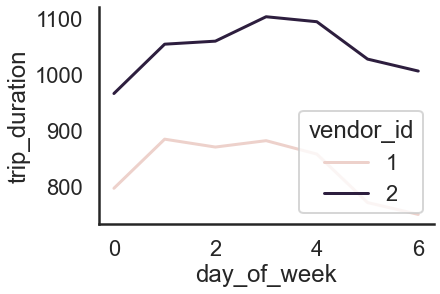

In [27]:
summary_wdays_avg_duration = pd.DataFrame(df.groupby(['vendor_id','day_of_week'])['trip_duration'].mean())
summary_wdays_avg_duration.reset_index(inplace = True)
summary_wdays_avg_duration['unit']=1

sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
sns.lineplot(data=summary_wdays_avg_duration, x="day_of_week", y="trip_duration", hue="vendor_id")
sns.despine(bottom = False)


### Median Trip Duration Vendor Wise

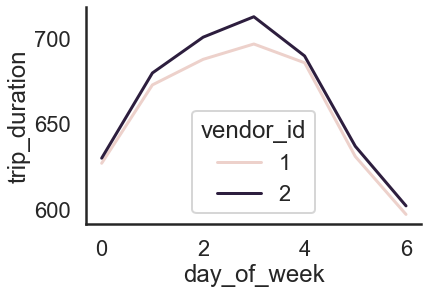

In [28]:
summary_wdays_avg_duration = pd.DataFrame(df.groupby(['vendor_id','day_of_week'])['trip_duration'].median())
summary_wdays_avg_duration.reset_index(inplace = True)
summary_wdays_avg_duration['unit']=1

sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
sns.lineplot(data=summary_wdays_avg_duration, x="day_of_week", hue="vendor_id", y="trip_duration")
sns.despine(bottom = False)


Median trip duration does not vary much as can be seen from the above plot for different vendors. It emphasises the importance of looking at the correct measure for central tendency for analysis.

### Trip Duration vs Passenger Count

Again as we are aware, there are a large number of outliers for trip duration and we will not be able to observe the differences. For this, we have taken a cutoff of 10000 seconds and used a boxplot.

In [29]:
df.passenger_count.value_counts()

1    515243
2    104576
5     38776
3     29561
6     24035
4     13972
0        31
9         1
Name: passenger_count, dtype: int64

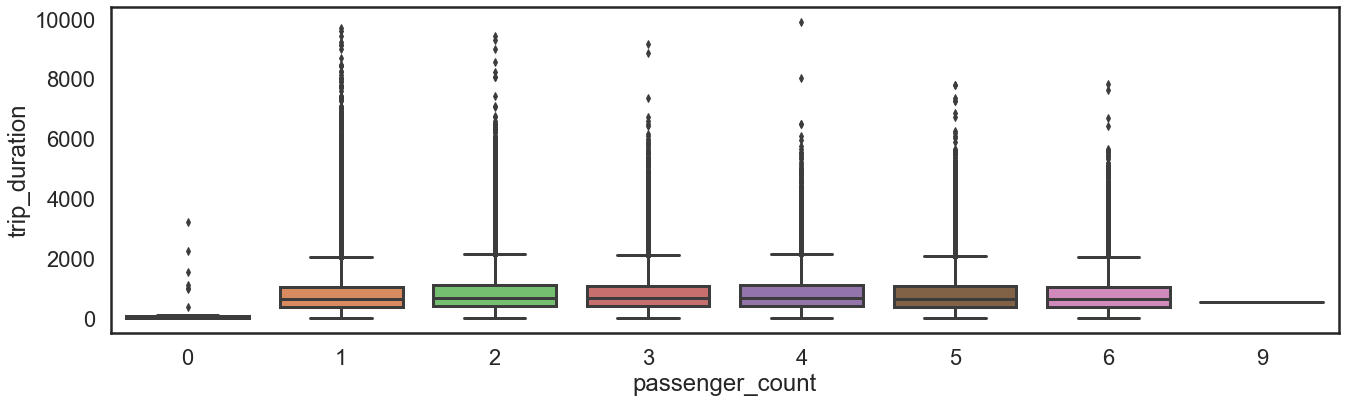

In [30]:
df.passenger_count.value_counts()
plt.figure(figsize=(22, 6))
df_sub = df[df['trip_duration'] < 10000]
sns.boxplot(x="passenger_count", y="trip_duration", data=df_sub)
plt.show()

* The boxplot clearly shows that there not much of a difference in distribution for the most frequently occuring passenger count values - 1, 2, 3.
* Another key observation is that the number of outliers are reduced for higher passenger counts but that only comes down to the individual frequencies of each passenger count.

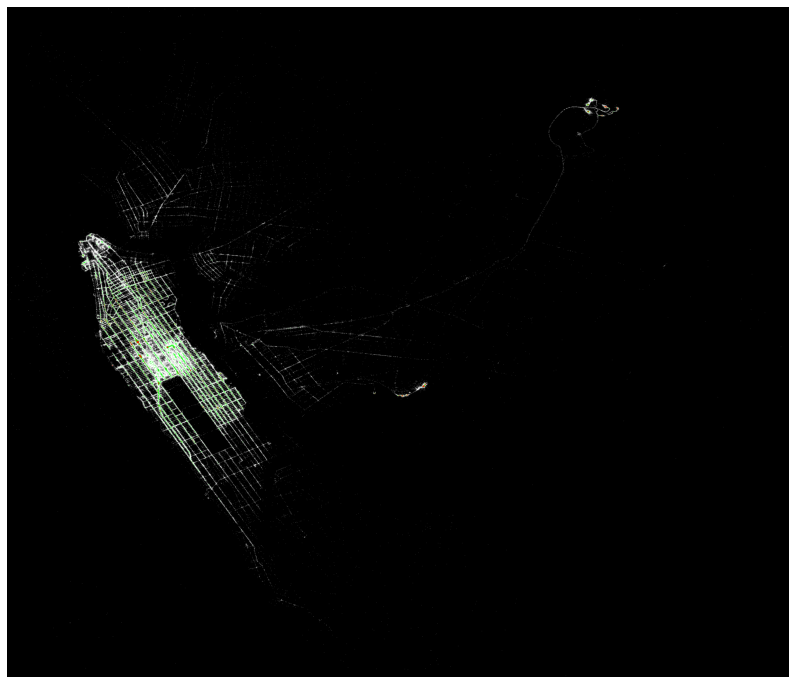

In [31]:
rgb = np.zeros((3000, 3500, 3), dtype=np.uint8)
rgb[..., 0] = 0
rgb[..., 1] = 0
rgb[..., 2] = 0
df_data_new['pick_lat_new'] = list(map(int, (df['pickup_latitude'] - (40.6000))*10000))
df_data_new['drop_lat_new'] = list(map(int, (df['dropoff_latitude'] - (40.6000))*10000))
df_data_new['pick_lon_new'] = list(map(int, (df['pickup_longitude'] - (-74.050))*10000))
df_data_new['drop_lon_new'] = list(map(int,(df['dropoff_longitude'] - (-74.050))*10000))

summary_plot = pd.DataFrame(df_data_new.groupby(['pick_lat_new', 'pick_lon_new'])['id'].count())

summary_plot.reset_index(inplace = True)
summary_plot.head(120)
lat_list = summary_plot['pick_lat_new'].unique()
for i in lat_list:
    lon_list = summary_plot.loc[summary_plot['pick_lat_new']==i]['pick_lon_new'].tolist()
    unit = summary_plot.loc[summary_plot['pick_lat_new']==i]['id'].tolist()
    for j in lon_list:
        a = unit[lon_list.index(j)]
        if (a//25) >0:
            rgb[i][j][0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 0
        elif (a//10)>0:
            rgb[i,j, 0] = 0
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 0
        else:
            rgb[i,j, 0] = 255
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 255
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,20))
ax.imshow(rgb, cmap = 'hot')
ax.set_axis_off() 

Findings - From the heatmap kind of image above -

* White points - 1-10 trips have white as pickup point
* Green points - 10-25 trips have green as pickup point
* Red points - More than 25 trips have red as pickup point

As expected there are a few small clusters for hot pickup points as displayed by red in the above plot. Most pickup points have less than 10 trips and distributed all over the city.

If you go and have a look at an actual map of New York City, red and green points are mostly concentrated around the Manhatten Area

### Correlation Heatmap

Let us quickly look at the correlation heatmap to check the correlations amongst all features.

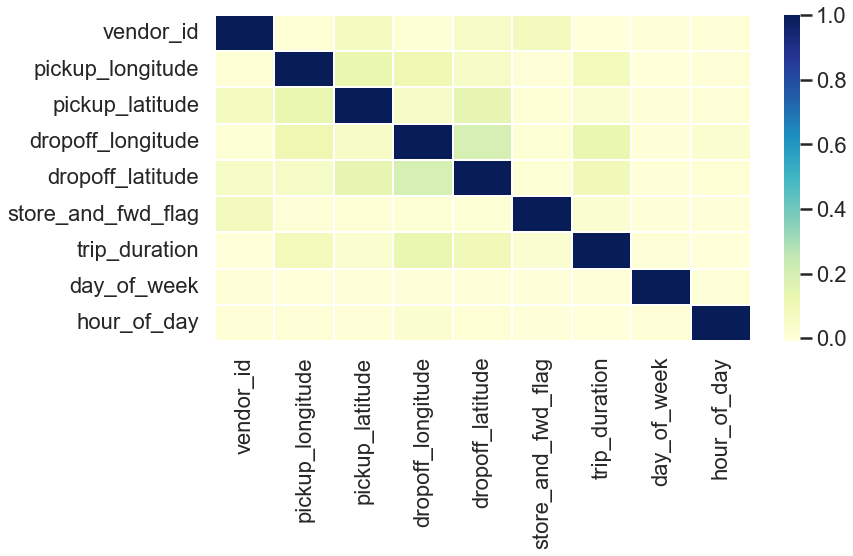

In [32]:
plt.figure(figsize=(12, 6))
df = df.drop(['id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count','check_trip_duration','log_trip_duration'],
        axis=1)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

In [33]:
df

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day
0,2,-73.953918,40.778873,-73.963875,40.771164,0,400,0,16
1,1,-73.988312,40.731743,-73.994751,40.694931,0,1100,4,23
2,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,6,17
3,2,-73.961670,40.759720,-73.956779,40.780628,0,1141,1,9
4,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2,6
...,...,...,...,...,...,...,...,...,...
729317,2,-73.965919,40.789780,-73.952637,40.789181,0,296,5,13
729318,1,-73.996666,40.737434,-74.001320,40.731911,0,315,0,0
729319,1,-73.997849,40.761696,-74.001488,40.741207,0,673,4,18
729320,1,-74.006706,40.708244,-74.013550,40.713814,0,447,6,9


# Building Basic Predictive Models Over the NYC Taxi Trip dataset.
We are provided with the NYC Taxi Trip Dataset. This dataset contains information about the taxi trips 
that took place in different parts of New York City and how much time did that trip take to complete.
In this project, the following are the tasks you must complete and submitted.
1. Choose the most suitable evaluation metric and state why you chose it.
2. Build a benchmark model for the given dataset.
3. Build a K-Nearest neighbours’ model for the given dataset and find the best value of K.
4. Build a Linear model for the given dataset with regularisation. Attempt to interpret the variable coefficients of the Linear Model.
5. Build a Decision tree model for the given dataset. Attempt to interpret the variable importance.
6. Plot the following Bar plots:
0. train score of all the above models.
1. test (not validation!) score of all the above models.
2. Attempt to explain the observations from the plots (optional) Guidelines:
The code should be submitted in the form of pdf format of the jupyter notebook. The option 
could be found in the “File > Download as” section in the notebook.
1. Make sure the pdf format notebook contains all the relevant output of the code cells. 
Notebooks that have not been run for displaying the outputs will be marked as incomplete.
2. The code should be well commented on and documented.
3. All project files should be added in a folder with your name and then compressed. 
(Right-click on the folder> Send to > Compressed (zipped) folder) and give the file your name. Then you may upload this zipped file on the project submission page.


# 1. Choose the most suitable evaluation metric and state why you chose it.
Mean Squared Error
Mean Squared Error, or MSE for short, is a popular error metric for regression problems.

It is also an important loss function for algorithms fit or optimized using the least squares framing of a regression problem. Here “least squares” refers to minimizing the mean squared error between predictions and expected values.

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.

In [34]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

import time
from sklearn import metrics
     

In [35]:
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 7294)

In [36]:
print("Size of Independenet variables:", X_train.shape, X_test.shape)
print("size of Dependenet variables:", y_train.shape, y_test.shape)

Size of Independenet variables: (580956, 8) (145239, 8)
size of Dependenet variables: (580956,) (145239,)


# Model Creation

# LinearRegression Model

In [164]:
from sklearn.linear_model import LinearRegression
import time
start_time_1 = time.time()
lm_regression = LinearRegression()
lm_regression.fit(X_train, y_train)
end_time_1 = time.time()
lm_time_1 = (end_time_1 - start_time_1)
print(f"Time taken to train linear regression model : {lm_time_1} seconds")

Time taken to train linear regression model : 0.18132781982421875 seconds


In [38]:
xtrain_pred =lm_regression.predict(X_train)
xtrain_pred

array([13.43288187, 12.16546449, 13.71314566, ..., 14.09294565,
       14.36812518, 13.00103983])

In [39]:
trips = lm_regression.predict(X_test)
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': trips})
predictions

,Actual,Predicted
433122,22,14.534978
259206,10,14.037793
677032,20,13.894237
230687,2,14.493795
98089,11,12.875862
...,...,...
87031,7,13.717783
487528,22,12.665372
138169,23,14.227127
159247,9,13.947441


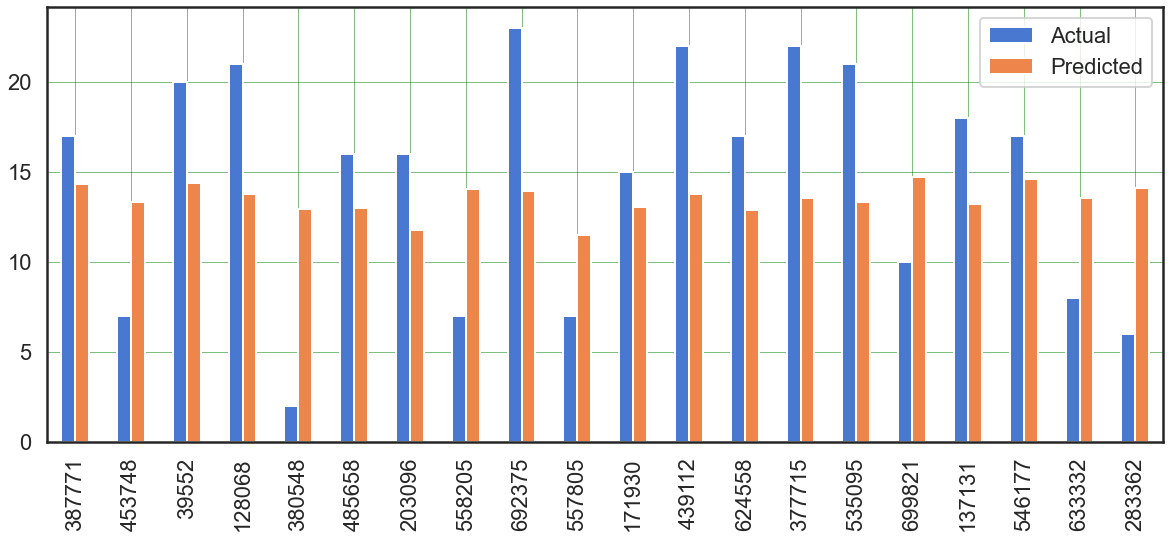

In [40]:
predictions.sample(20).plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

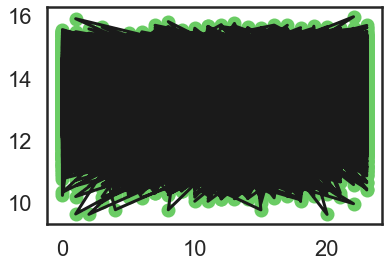

In [41]:
# Plotting the observed vs predicted values
plt.scatter(y_test, trips,color='g') 
plt.plot(y_test, trips,color='k') 
plt.show()

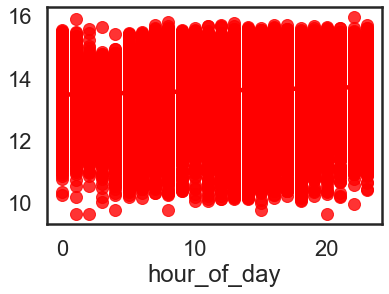

In [42]:
sns.regplot(x=y_test,y=trips,ci=None,color ='red');

In [43]:
lm_regression.predict(X_train)

array([13.43288187, 12.16546449, 13.71314566, ..., 14.09294565,
       14.36812518, 13.00103983])

In [44]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lm_regression.predict(X_train),y_train,squared=False)

6.366597045305033

In [45]:
lm_score_train = lm_regression.score(X_train, y_train)
lm_score_test = lm_regression.score(X_test, y_test)

In [46]:
print(lm_score_train)
print(lm_score_test)

0.010741845805854022
0.01082780394686289


In [47]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

score = calc(lm_regression.coef_, lm_regression.intercept_, 9.5)
print(score)

[-625.9771828  -570.31978625 -595.42304172 -737.2201421  -606.09137591
 -624.58729279 -627.09968183 -629.60432999]


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [49]:
mae = mean_absolute_error(y_test, trips)
mse = mean_squared_error(y_test, trips)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 5.36
Mean squared error: 40.56
Root mean squared error: 6.37


In [123]:
lm_score = r2_score(y_test, trips)
print(lm_score)

0.0068223027124215685


The r2_score is above 0.5 which is a good thing but it is quite low for a regression model.
Let's Move towards next Model

# Lasso Regression

In [168]:
from sklearn import linear_model
start_time_2 = time.time()
lasso = linear_model.Lasso(alpha=0.01,max_iter=100, tol=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
end_time_2 = time.time()
lm_time_2 = (end_time_2 - start_time_2)
print(f"Time taken to train lasso regression model : {lm_time_2} seconds")

Lasso model: [ 7.94170337e-02  0.00000000e+00  0.00000000e+00 -5.30809953e-01
  0.00000000e+00  0.00000000e+00  3.49511063e-06 -2.66588517e-01]
Time taken to train lasso regression model : 0.1341698169708252 seconds


In [126]:
trips_1 = lasso.predict(X_test)
predictions_1 = pd.DataFrame({'Actual': y_test, 'Predicted': trips_1})
predictions_1

,Actual,Predicted
433122,22,14.460633
259206,10,13.934867
677032,20,13.599825
230687,2,14.399299
98089,11,12.890938
...,...,...
87031,7,13.586483
487528,22,12.798389
138169,23,14.209836
159247,9,13.855631


In [131]:
lasso_train_score= lasso.score(X_train, y_train)
lasso_test_score= lasso.score(X_test, trips_1)

In [132]:
print(lasso_train_score)
print(lasso_test_score)

0.007097665928210817
1.0


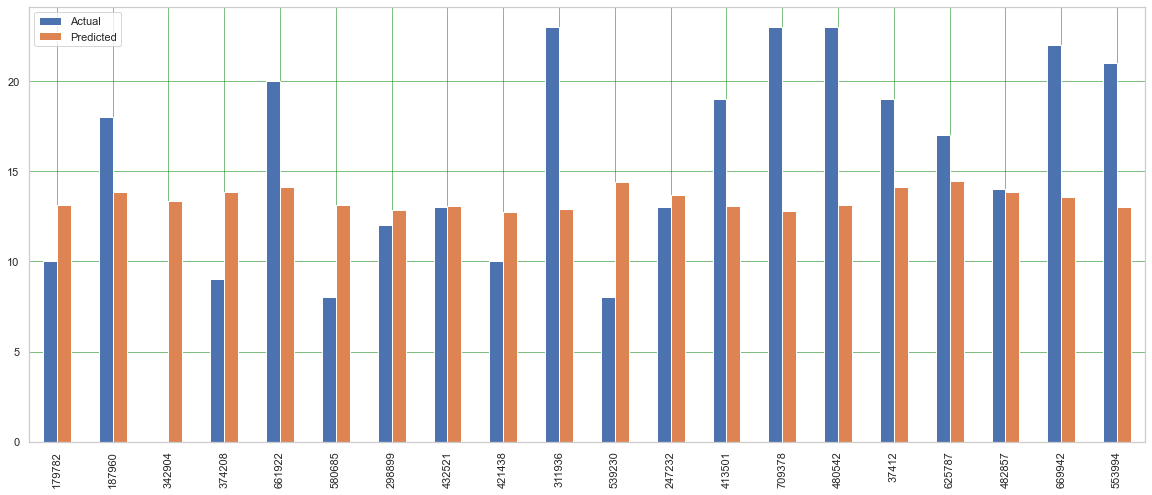

In [127]:
predictions_1.sample(20).plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Ridge Regression

In [167]:
start_time_3 = time.time()
ridge = linear_model.Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
end_time_3 = time.time()
lm_time_3 = (end_time_3 - start_time_3)
print(f"Time taken to train ridge regression model : {lm_time_3} seconds")

Ridge model: [ 1.18165760e-01  5.97270626e+00  3.33110903e+00 -1.15848688e+01
  2.21098281e+00  2.64411779e-01  5.46189600e-06 -2.63645587e-01]
Time taken to train ridge regression model : 0.09235906600952148 seconds


In [134]:
trips_2 = lasso.predict(X_test)
predictions_2 = pd.DataFrame({'Actual': y_test, 'Predicted': trips_2})
predictions_2

,Actual,Predicted
433122,22,14.460633
259206,10,13.934867
677032,20,13.599825
230687,2,14.399299
98089,11,12.890938
...,...,...
87031,7,13.586483
487528,22,12.798389
138169,23,14.209836
159247,9,13.855631


In [135]:
ridge_train_score= ridge.score(X_train, y_train)
ridge_test_score= ridge.score(X_test, trips_2)

In [136]:
print(ridge_train_score)
print(ridge_test_score)

0.010741844359321129
0.4501004264887637


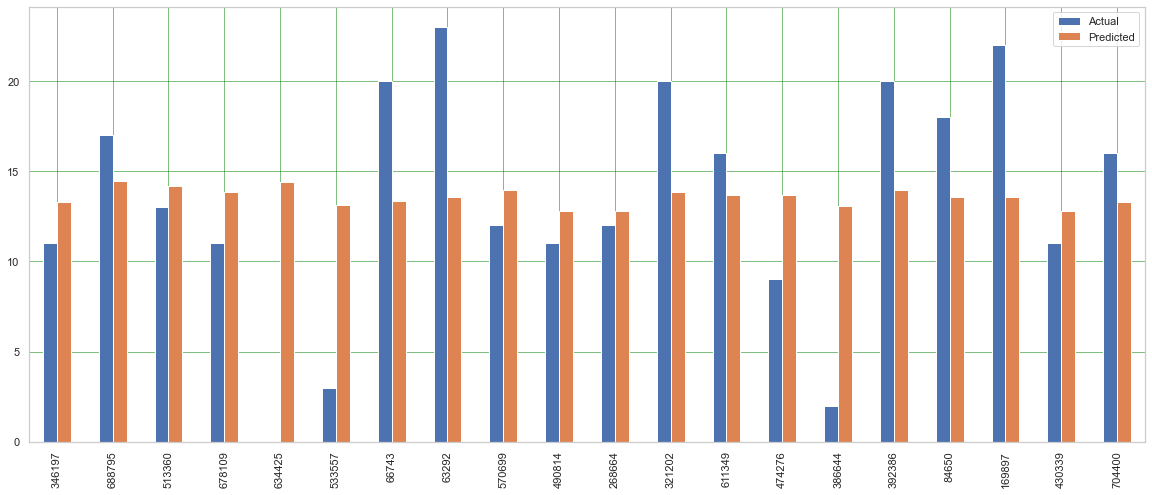

In [137]:
predictions_2.sample(20).plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Decision Tree Regression Model

In [169]:
from sklearn.tree import DecisionTreeRegressor
start_time_4 = time.time()
dt_regression = DecisionTreeRegressor()
dt_regression = dt_regression.fit(X_train, y_train)
end_time_4 = time.time()
dt_time_4 = (end_time_4 - start_time_4)
print(f"Time taken to train Decision tree model : {dt_time_4} seconds")

Time taken to train Decision tree model : 18.019447088241577 seconds


In [140]:
trips_3 = dt_regression.predict(X_test)
predictions_3 = pd.DataFrame({'Actual': y_test, 'Predicted': trips_3})
predictions_3

,Actual,Predicted
433122,22,9.0
259206,10,20.0
677032,20,8.0
230687,2,8.0
98089,11,19.0
...,...,...
87031,7,10.0
487528,22,1.0
138169,23,23.0
159247,9,19.0


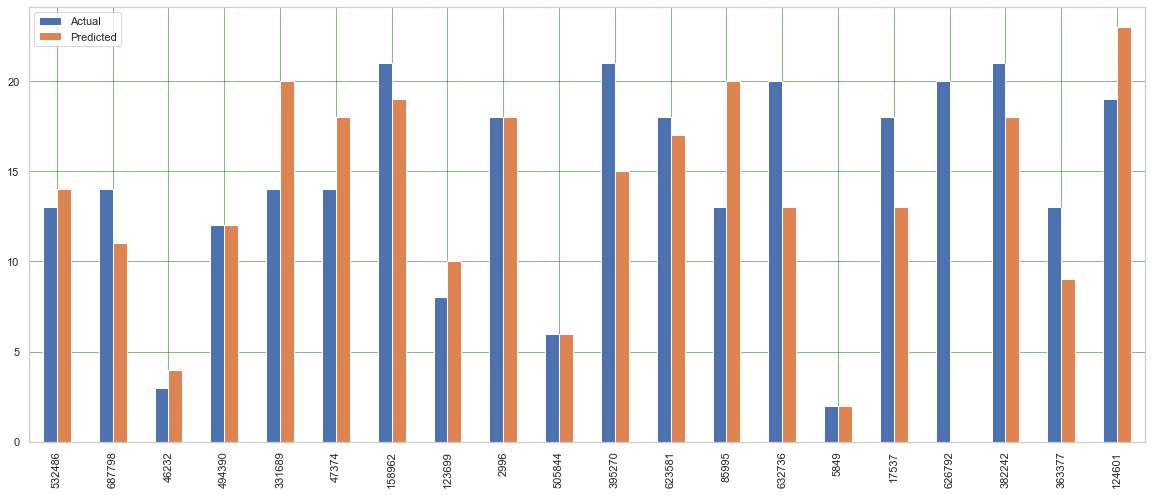

In [141]:
predictions_3.sample(20).plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [142]:
decision_train_score= dt_regression.score(X_train, y_train)
decision_test_score= dt_regression.score(X_test, trips_3)

In [143]:
print(decision_train_score)
print(decision_test_score)

1.0
1.0


In [146]:
from sklearn.metrics import r2_score
dt_score2 = r2_score(y_test, trips_3)
print(dt_score2)

-0.6743779615023913


In [147]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

In [148]:
mse =mean_squared_error(trips_3,y_test)
rmse=np.sqrt(mse)
rmse

8.285773717013333

# K-Nearest Neighbors Algorithm for Regression

In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

In [150]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [68]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.589996450833414
RMSE value for k=  2 is: 7.534446174133621
RMSE value for k=  3 is: 7.140566077130009
RMSE value for k=  4 is: 6.946193063561815
RMSE value for k=  5 is: 6.828747510532492
RMSE value for k=  6 is: 6.755645336836029
RMSE value for k=  7 is: 6.7015627065147925
RMSE value for k=  8 is: 6.660446728003305
RMSE value for k=  9 is: 6.628747536266985
RMSE value for k=  10 is: 6.603807029553548
RMSE value for k=  11 is: 6.585291843280683
RMSE value for k=  12 is: 6.568830153659774
RMSE value for k=  13 is: 6.553849655004517
RMSE value for k=  14 is: 6.54016297035947
RMSE value for k=  15 is: 6.529244137638776
RMSE value for k=  16 is: 6.518168438643507
RMSE value for k=  17 is: 6.509698456580604
RMSE value for k=  18 is: 6.501360221440912
RMSE value for k=  19 is: 6.495235991567639
RMSE value for k=  20 is: 6.487288327049028


<Figure size 1800x432 with 0 Axes>

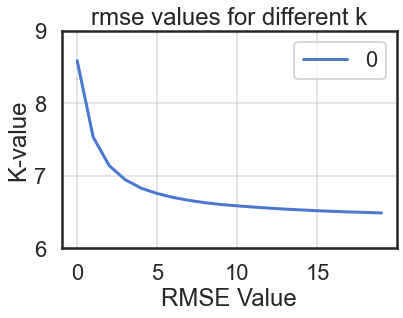

In [69]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
plt.figure(figsize=(25, 6))
curve.plot()

# set the limits 
plt.grid(visible=True, which='major',axis='both', alpha=0.5)
plt.ylim([0,20]) 
plt.ylim([6, 9]) 
plt.xlabel('RMSE Value')
plt.ylabel('K-value')
plt.title('rmse values for different k') 
    
# display the plot 
plt.show()

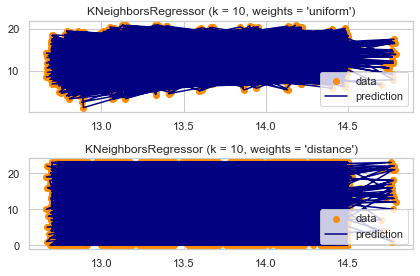

Time taken to train KNN regression model : 60.02170372009277 seconds


In [171]:
n_neighbors = 10
start_time_5 = time.time()
for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(X_test)

    plt.subplot(2, 1, i + 1)
    plt.scatter(trips, y_, color="darkorange", label="data")
    plt.plot(trips, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()
end_time_5 = time.time()
lm_time_5 = (end_time_5 - start_time_5)
print(f"Time taken to train KNN regression model : {lm_time_5} seconds")

In [154]:
predictions_4 = pd.DataFrame({'Actual3': y_test, 'Predicted3': y_})
predictions_4

,Actual3,Predicted3
433122,22,22.0
259206,10,10.0
677032,20,20.0
230687,2,2.0
98089,11,11.0
...,...,...
87031,7,7.0
487528,22,22.0
138169,23,23.0
159247,9,9.0


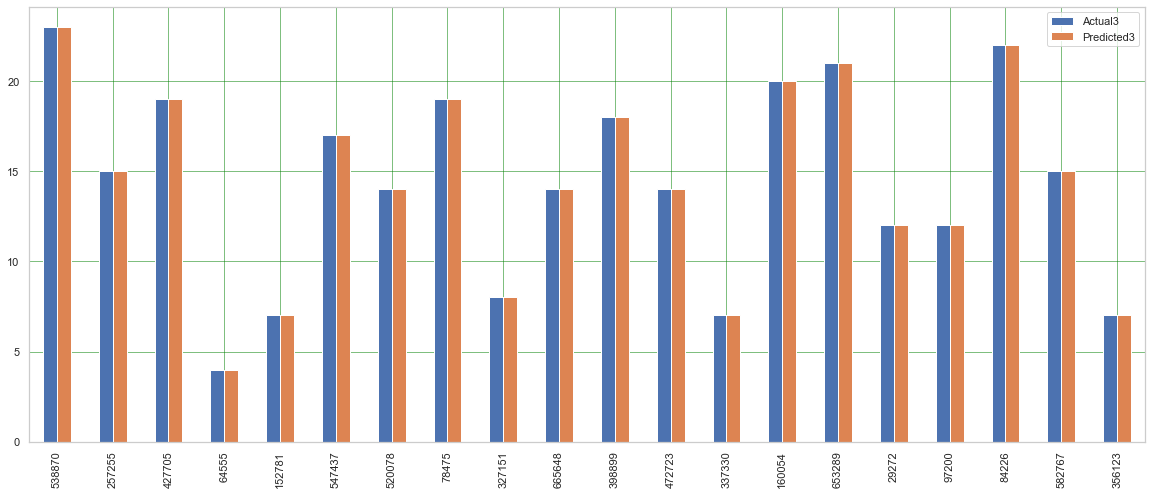

In [155]:
predictions_4.sample(20).plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [156]:
knn_train_score= knn.score(X_train, y_train)
knn_test_score= knn.score(X_test, y_)

In [158]:
print(knn_train_score)
print(knn_test_score)

1.0
1.0


In [159]:
train_preds = model.predict(X_train)
mse = mean_squared_error(y_test, y_)
rmse = sqrt(mse)
rmse

0.0

# 6. Plot the following Bar plots:

## 0. train score of all the above models.

In [160]:
dict_train = {'linear': lm_score_train, 'lasso': lasso_train_score, 'ridge': ridge_train_score, 'decicion tree': decision_train_score, 'knn': knn_train_score}
dict_train

{'linear': 0.010741845805854022,
 'lasso': 0.007097665928210817,
 'ridge': 0.010741844359321129,
 'decicion tree': 1.0,
 'knn': 1.0}

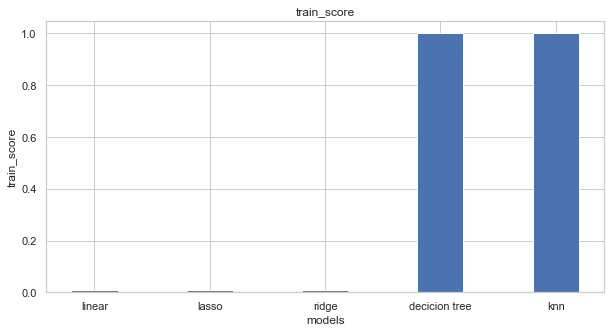

In [161]:
train_score_key = list(dict_train.keys())
train_score_values = list(dict_train.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_score_key, train_score_values, width = 0.4)
 
plt.xlabel("models")
plt.ylabel("train_score")
plt.title("train_score")
plt.show()

## 1. test (not validation!) score of all the above models.

In [173]:
dict_test = {'linear': lm_score_test, 'lasso': ridge_test_score, 'ridge': ridge_test_score, 'decicion tree': decision_test_score, 'knn': knn_test_score}

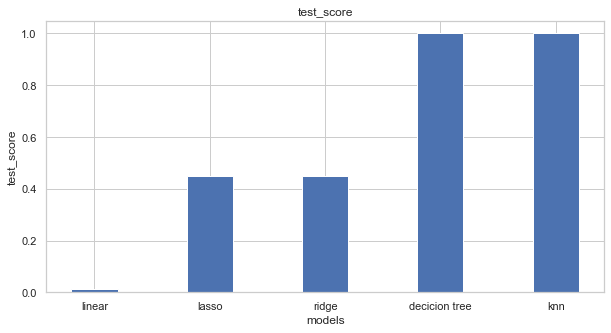

In [163]:
test_score_key = list(dict_test.keys())
test_score_values = list(dict_test.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(test_score_key, test_score_values, width = 0.4)
 
plt.xlabel("models")
plt.ylabel("test_score")
plt.title("test_score")
plt.show()

In [175]:
dict_test = {'linear': lm_time_1, 'lasso': lm_time_2, 'ridge': lm_time_3, 'decicion tree': dt_time_4, 'knn': lm_time_5}
dict_test

{'linear': 0.18132781982421875,
 'lasso': 0.1341698169708252,
 'ridge': 0.09235906600952148,
 'decicion tree': 18.019447088241577,
 'knn': 60.02170372009277}

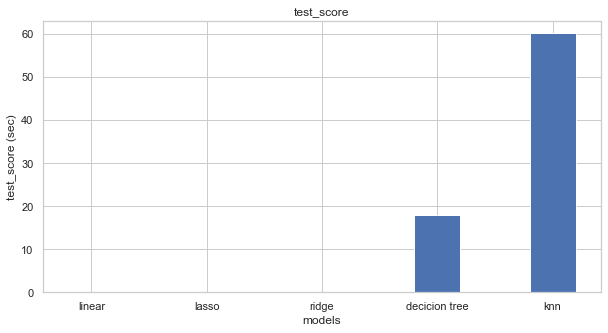

In [178]:
model = list(dict_test.keys())
time = list(dict_test.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(model, time, width = 0.4)
 
plt.xlabel("models")
plt.ylabel("test_score (sec)")
plt.title("test_score")
plt.show()

# Lets Analysis all the model we train and based on their score and time taken for execution.

## 2. Attempt to explain the observations from the plots (optional) Guidelines:

I discussed a variety of machine learning development cycle topics in this project. I found that the investigation of the data and variable analysis is a crucial part of the process overall and should be carried out to ensure a complete knowledge of the data. While researching, I also cleansed the data because some outliers needed to be addressed before feature engineering. Additionally, we used feature engineering to filter out and collect only the best features—those that are more important and accounted for the majority of the variance in the dataset. In order to achieve the results, I eventually trained the models using the best feature set.

It uses a variety of machine learning algorithms and is developed in Python. A basic summary of the broad strategy I used is given below:

Data loading and standard inspections We used a function from the pandas library to load the data from the provided csv files. Next, I reviewed the fundamental data facts.

Exploratory Data Analysis: The id variable was eliminated because it doesn't provide much context. We then used the latitude and longitude for pick-up and drop-off to determine the distance using the haversine formula. Then we plotted a box plot for the variable and noticed that there were a few outliers. As a result, we separated this variable and discovered that most trips were under 10 kilometres, some were within 50 kilometres, and very few were over 50 kilometres. So I cut out trips with 0 and greater than 50 km in length. I verified the passenger count and store_and_fwd_flag categorical variables. I saw that the bulk of one category was present in the store and forward flag. I therefore remove this characteristic from our dataset.

Then, I tried doing feature selection, a linear model suited to my data, Decison Tree and Lasso and Ridge regression. On my dataset, I have now run a Decison Tree regression that unquestionably outperformed a linear regression.
Linear Regression takes Least amount of time but doesn't give much accuracy and efficiency.

I will use new modelling techniques as I learn them in the hopes of discovering the ideal model for our dataset.

### Conclusions
1. The majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just around exp(6.5)  i.e. about 17 minutes.
2. There are several suspiciously short rides with less than 10 seconds duration.
3. As discussed earlier, there are a few huge outliers near 12.
4. Most of the trips involve only 1 passenger. There are trips with 7-9 passengers but they are very low in number.
5. Vendor 2 has more number of trips as compared to vendor 1
6. Number of pickups for weekends is much lower than week days with a peak on Thursday (4). Note that here weekday is a decimal number, where 0 is Sunday and 6 is Saturday.
7. Number of pickups as expected is highest in late evenings. However, it is much lower during the morning peak hours.
8. We see that most trips are concentrated between these lat long only with a few significant clusters. These clusters are represented by the numerous peaks in the lattitude and longitude histograms
9. Trip durations are definitely shorter for late night and early morning hours that can be attributed to low traffic density
10. It follows a similar pattern when compared to number of pickups indicating a correlation between number of pickups and trip duration
11. Median trip duration does not vary much as can be seen from the above plot for different vendors.
12. The boxplot clearly shows that there not much of a difference in distribution for the most frequently occuring passenger count values - 1, 2, 3.
13. Another key observation is that the number of outliers are reduced for higher passenger counts but that only comes down to the individual frequencies of each passenger count.
14. From the correlation heatmap we see that the lattitude and longitude features have higher correlation with the target as compared to the other features.

# REGRESSION
Evaluation metrics play a very significant role in building any machine learning model. The Mean squared error, root mean squared error, mean absolute error, R-Squared, and Adjusted R-squared are used to evaluate the performance of the model in regression algorithms.

Conclusion
According to the whole data analysis and visualization we have tried five of the best algorithms known and we have came to the conclusion that Decison Tree is the best suitable algorithm in this scenario as it gives best accuracy in least amount of time.

So, Here we conclude the analysis with the conclusion that Decison Tree algorithm is best suitable algorithm for this dataset.